In [87]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing

In [89]:
#Read Dataset
df = pd.read_csv('./medical_clean.csv', index_col=0)
#Verifying data, data types, and size of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [91]:
#Detecting any issues with data
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [93]:
#C2 Summary Stats for Variables
df.Children.value_counts().sort_index()

Children
0     2548
1     2509
2     1475
3     1489
4      995
5      169
6      191
7      213
8      209
9      108
10      94
Name: count, dtype: int64

In [95]:
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [97]:
df.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

In [99]:
df.Income.nsmallest(n=20)

CaseOrder
822      154.08
9809     300.79
288      395.23
111      401.86
8659     493.04
9129     695.22
5894     702.16
3484     798.98
1216     826.01
6300     881.07
1035     881.40
3457     953.74
6107    1048.43
3259    1078.12
2514    1196.72
5       1209.56
9088    1277.08
2299    1286.25
1384    1301.34
9029    1366.98
Name: Income, dtype: float64

In [101]:
df.Income.nlargest(n=20)

CaseOrder
8387    207249.10
842     204542.41
8599    203774.60
6407    197675.00
1779    197576.18
7493    196915.60
4332    194796.24
7245    190110.80
4408    189416.27
3074    189129.92
7716    186791.40
8530    186752.00
6600    183037.10
9588    179543.70
7405    178945.40
174     178470.63
2323    174745.85
6695    171680.20
623     171288.05
9480    171031.20
Name: Income, dtype: float64

In [103]:
df.Gender.value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [105]:
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [107]:
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [109]:
df.Initial_admin.value_counts().sort_index()

Initial_admin
Elective Admission       2504
Emergency Admission      5060
Observation Admission    2436
Name: count, dtype: int64

In [111]:
df.Complication_risk.value_counts().sort_index()

Complication_risk
High      3358
Low       2125
Medium    4517
Name: count, dtype: int64

In [113]:
df.Arthritis.value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [115]:
df.Diabetes.value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [117]:
df.BackPain.value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [119]:
df.TotalCharge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [121]:
df.TotalCharge.nlargest(n=20)

CaseOrder
5713    9180.728
8988    9169.248
5501    9080.912
9404    9077.388
5462    9067.605
7711    9065.054
9136    9028.118
7826    9022.166
9158    9012.388
7295    9004.401
7147    8990.888
9257    8979.087
7215    8975.566
7044    8969.073
9583    8963.124
6690    8962.874
5649    8957.794
7613    8950.139
5066    8948.540
8916    8943.753
Name: TotalCharge, dtype: float64

In [123]:
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [125]:
df.Initial_days.nlargest(n=20)

CaseOrder
7969    71.98149
5327    71.96869
7480    71.96546
6167    71.96415
8067    71.96342
5875    71.96164
5830    71.96134
9160    71.95813
8818    71.95472
7525    71.94732
9075    71.94459
7840    71.92930
9678    71.92647
9222    71.92413
5163    71.92171
9102    71.90712
9767    71.90694
5375    71.90056
6602    71.89863
7215    71.89805
Name: Initial_days, dtype: float64

In [127]:
#C3 Preparing Data for Use

#Convert column to category from string
df["Area"] = df["Area"].astype("category")
#Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")

#Reformat column representing currency in USD
df["Income"] = df["Income"].astype(int)
#Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
#Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
#Recast object > boolean Yes will = 1 and No with = 0
bool_mapping = {"Yes" : 1, "No" : 0}
#Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
#Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
#Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
#Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
#Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
#Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
#Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
#Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
#Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
#Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
#Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
#Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
#Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
#Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
#Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)
#Convert column to category from string
df["Services"] = df["Services"].astype("category")

#Giving meaning to these survey variables
#Establish map for reversing survey questions where 1 < 8
survey_map = {1: 8, 2: 7, 3 : 6, 4: 5, 5: 4, 6: 3, 7 : 2, 8 : 1}
#Establish ordered categorical datatype structure ("1" < "2" < ... < "7" < "8") for survey responses
survey_values = CategoricalDtype(categories=["1", "2", "3", "4", "5", "6", "7", "8"], ordered=True)

#Steps taken to remap categorical survey responses
#Step 1 - Remap column to reflect 1 < 8
df["Item1"] = df["Item1"].map(survey_map)
#Step 2 - Map integers to be strings
df["Item1"] = df["Item1"].map(str)
#Step 3 - Reassign datatype from strings to create survey_values
df["Item1"] = df["Item1"].astype(survey_values)

#Same 3 steps completed above will be completed to all "item" columns below
df["Item2"] = df["Item2"].map(survey_map)
df["Item2"] = df["Item2"].map(str)
df["Item2"] = df["Item2"].astype(survey_values)

df["Item3"] = df["Item3"].map(survey_map)
df["Item3"] = df["Item3"].map(str)
df["Item3"] = df["Item3"].astype(survey_values)

df["Item4"] = df["Item4"].map(survey_map)
df["Item4"] = df["Item4"].map(str)
df["Item4"] = df["Item4"].astype(survey_values)

df["Item5"] = df["Item5"].map(survey_map)
df["Item5"] = df["Item5"].map(str) 
df["Item5"] = df["Item5"].astype(survey_values)

df["Item6"] = df["Item6"].map(survey_map)
df["Item6"] = df["Item6"].map(str)
df["Item6"] = df["Item6"].astype(survey_values)

df["Item7"] = df["Item7"].map(survey_map)
df["Item7"] = df["Item7"].map(str)
df["Item7"] = df["Item7"].astype(survey_values)

df["Item8"] = df["Item8"].map(survey_map)
df["Item8"] = df["Item8"].map(str)
df["Item8"] = df["Item8"].astype(survey_values)

In [129]:
#Generate Dummy Values for Gender
gender_df = pd.get_dummies(data=df["Gender"], drop_first=True)
#Generate Dummy Values for Initial_admin
initial_admin_df = pd.get_dummies(data=df["Initial_admin"], drop_first=True)
#Generate Dummy Values for Complication_risk
comp_risk_df = pd.get_dummies(data=df["Complication_risk"], drop_first=True)

#Create new dataframe with the variables we're testing
regression_df = df[["Children", "Age", "Income", "VitD_levels", "Doc_visits", "Arthritis", "Diabetes", "BackPain", "Initial_days", "TotalCharge"]]

#Insert the generated dummy variables to new dataframe, placing them in the same order
#Dummy Values for Complication Risk
regression_df.insert(5, "comp_risk_medium", comp_risk_df.Medium)
regression_df.insert(5, "comp_risk_low", comp_risk_df.Low)
#Dummy Values for Initial Admit
regression_df.insert(5, "initial_admit_emerg", initial_admin_df["Emergency Admission"])
regression_df.insert(5, "initial_admit_observ", initial_admin_df["Observation Admission"])
#Dummy Values for Gender
regression_df.insert(3, "gender_nonbinary", gender_df.Male)
regression_df.insert(3, "gender_male", gender_df.Male)
#Check dataframe
regression_df

,Children,Age,Income,gender_male,gender_nonbinary,VitD_levels,Doc_visits,initial_admit_observ,initial_admit_emerg,comp_risk_low,comp_risk_medium,Arthritis,Diabetes,BackPain,Initial_days,TotalCharge
CaseOrder,,,,,,,,,,,,,,,,
1,1,53,86575,True,True,19.141466,6,False,True,False,True,1,1,1,10.585770,3726.702860
2,3,51,46805,False,False,18.940352,4,False,True,False,False,0,0,0,15.129562,4193.190458
3,3,53,14370,False,False,18.057507,4,False,False,False,True,0,1,0,4.772177,2434.234222
4,0,78,39741,True,True,16.576858,4,False,False,False,True,1,0,0,1.714879,2127.830423
5,1,22,1209,False,False,17.439069,5,False,False,True,False,0,0,0,1.254807,2113.073274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,25,45967,True,True,16.980860,4,False,True,False,True,0,0,0,51.561220,6850.942000
9997,4,87,14983,True,True,18.177020,5,False,False,False,True,1,1,0,68.668240,7741.690000
9998,3,45,65917,False,False,17.129070,4,False,False,False,False,0,0,0,70.154180,8276.481000


Text(0, 0.5, 'Number of Patients')

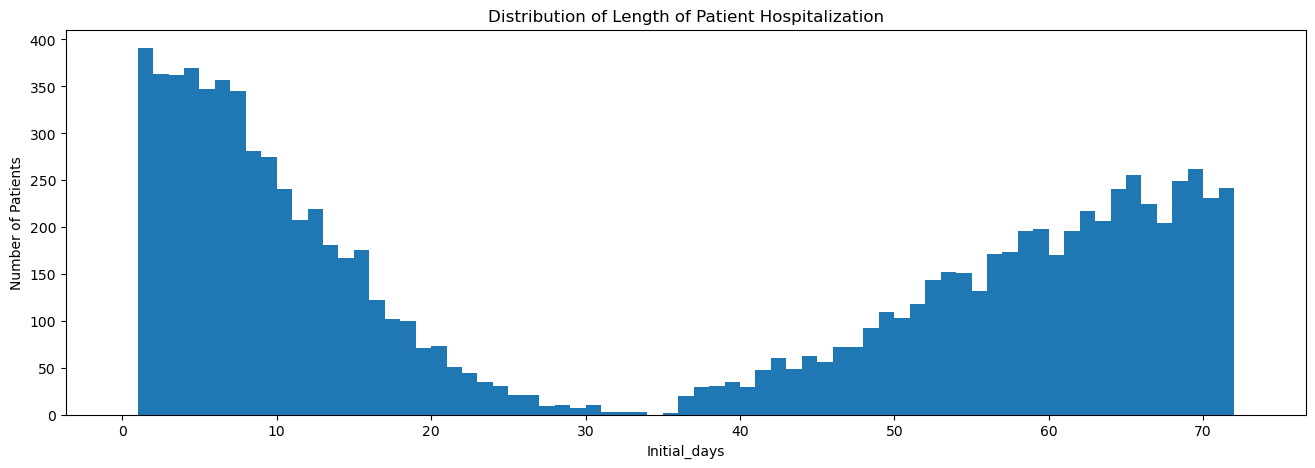

In [131]:
#C3 Univariate and Bivariate visualizations - this one is for Dependent Variable
plt.figure(figsize = [16,5])
plt.title("Distribution of Length of Patient Hospitalization")
bins = np.arange(0, 74, 1)
plt.hist(data=regression_df, x="Initial_days", bins=bins)
plt.xlabel("Initial_days")
plt.ylabel("Number of Patients")

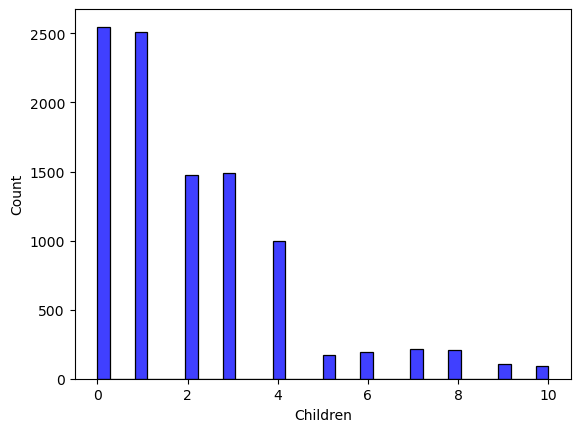

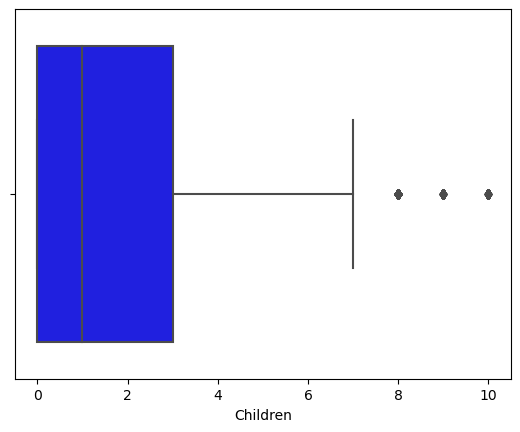

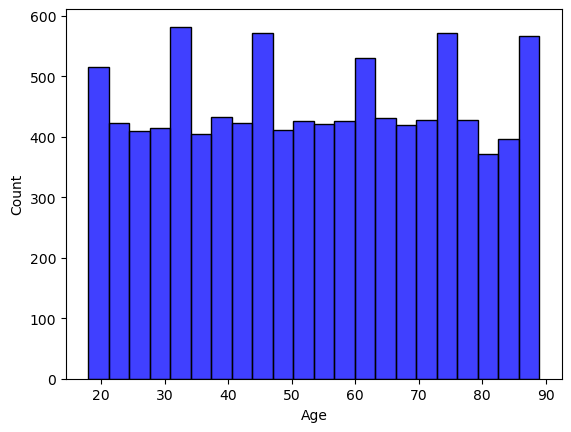

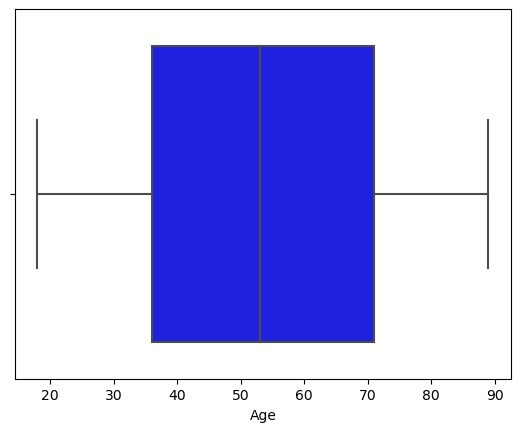

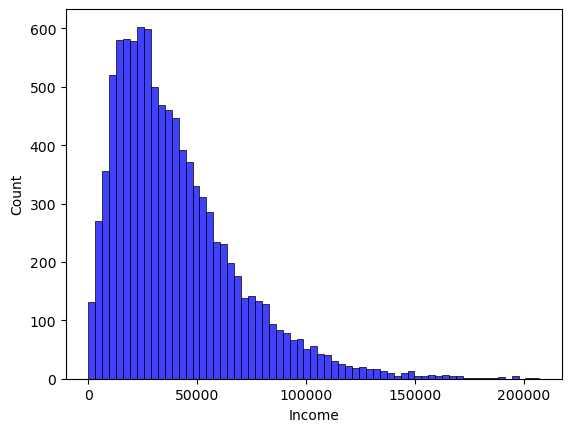

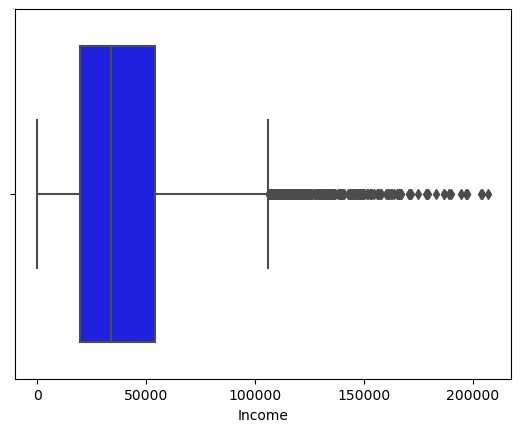

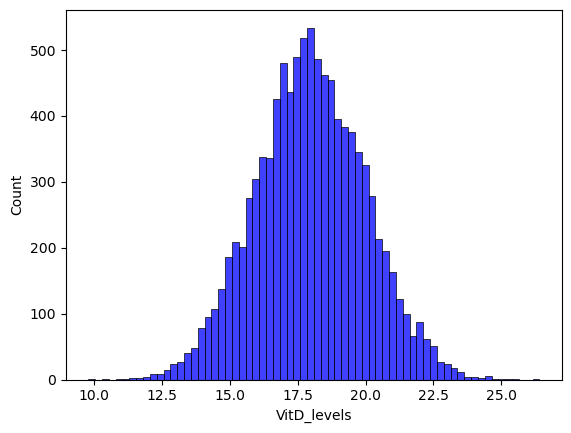

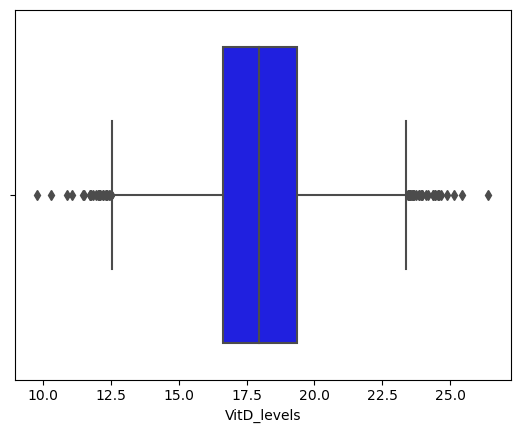

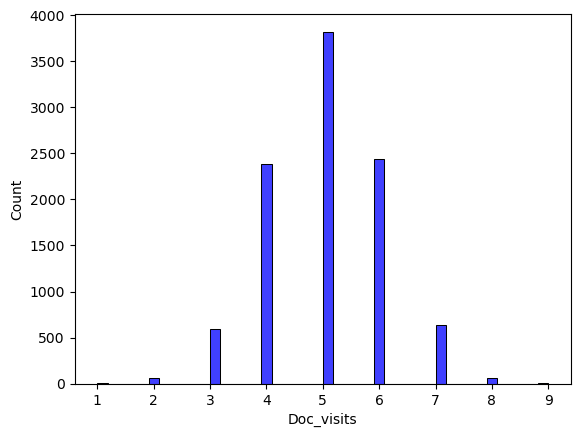

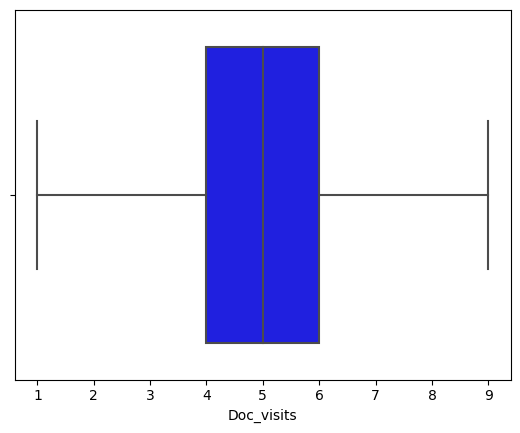

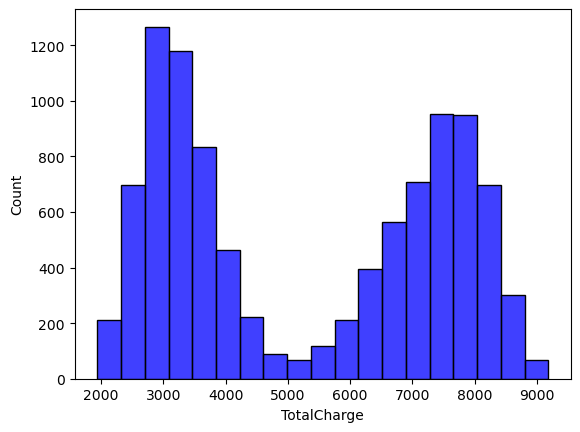

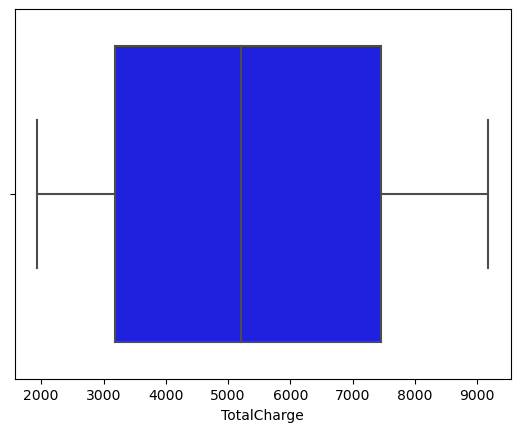

In [133]:
#C3 Univariate Visualizations for Independent Variables - Continuous Variables
sns.histplot(regression_df['Children'], color='blue')
plt.show()
sns.boxplot(x=regression_df['Children'], color='blue')
plt.show()

sns.histplot(regression_df['Age'], color='blue')  
plt.show()
sns.boxplot(x=regression_df['Age'], color='blue')
plt.show()

sns.histplot(regression_df['Income'], color='blue') 
plt.show()
sns.boxplot(x=regression_df['Income'], color='blue') 
plt.show()

sns.histplot(regression_df['VitD_levels'], color='blue') 
plt.show()
sns.boxplot(x=regression_df['VitD_levels'], color='blue') 
plt.show()

sns.histplot(regression_df['Doc_visits'], color='blue') 
plt.show()
sns.boxplot(x=regression_df['Doc_visits'], color='blue') 
plt.show()

sns.histplot(regression_df['TotalCharge'], color='blue') 
plt.show()
sns.boxplot(x=regression_df['TotalCharge'], color='blue') 
plt.show()

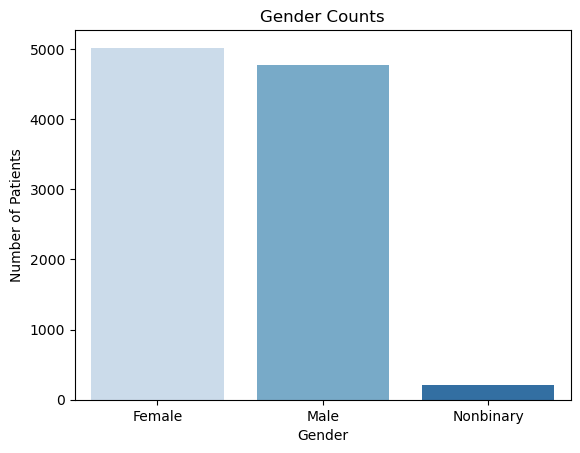

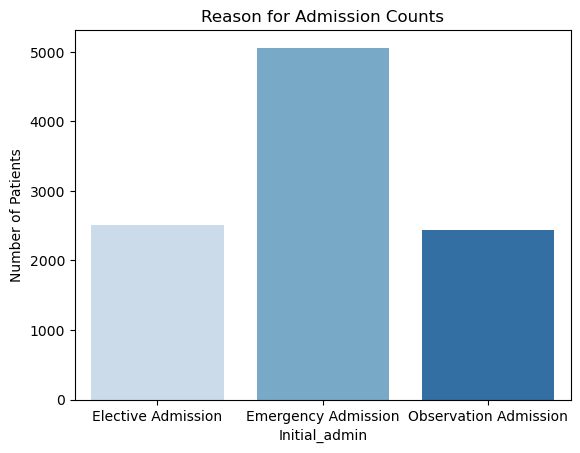

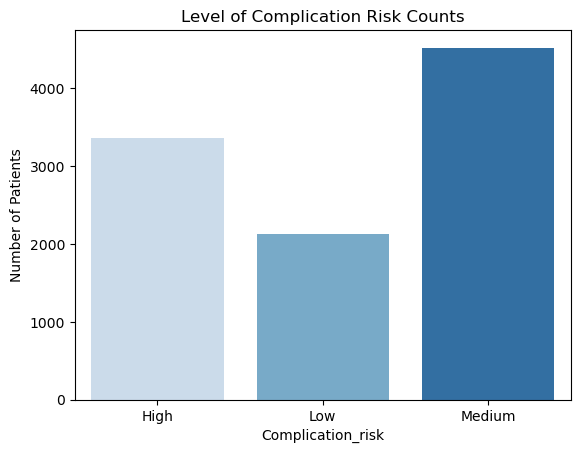

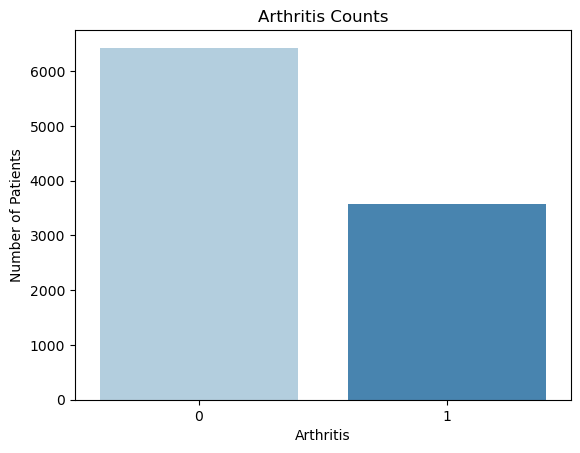

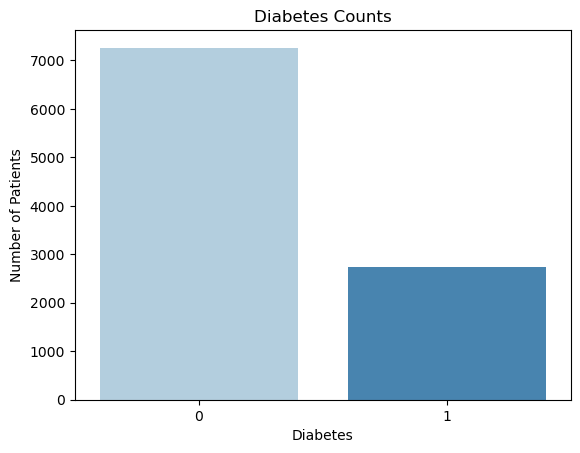

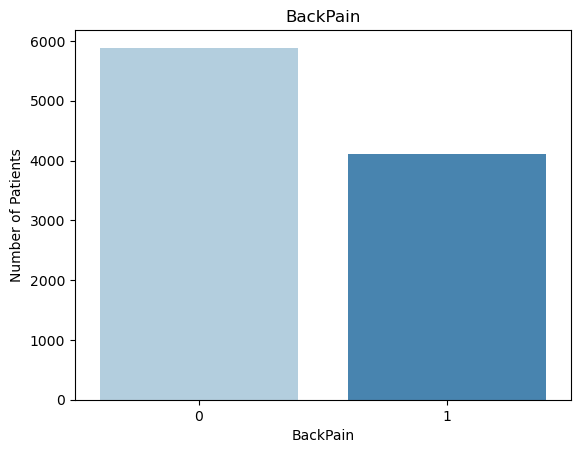

In [135]:
#Catagorical Data Distribution - Univariate Visualizations - Independent Variables Continued.
sns.countplot(x='Gender', data=df, palette='Blues')
plt.title('Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

sns.countplot(x='Initial_admin', data=df, palette='Blues')
plt.title('Reason for Admission Counts')
plt.xlabel('Initial_admin')
plt.ylabel('Number of Patients')
plt.show()

sns.countplot(x='Complication_risk', data=df, palette='Blues')
plt.title('Level of Complication Risk Counts')
plt.xlabel('Complication_risk')
plt.ylabel('Number of Patients')
plt.show()

sns.countplot(x='Arthritis', data=df, palette='Blues')
plt.title('Arthritis Counts')
plt.xlabel('Arthritis')
plt.ylabel('Number of Patients')
plt.show()

sns.countplot(x='Diabetes', data=df, palette='Blues')
plt.title('Diabetes Counts')
plt.xlabel('Diabetes')
plt.ylabel('Number of Patients')
plt.show()

sns.countplot(x='BackPain', data=df, palette='Blues')
plt.title('BackPain')
plt.xlabel('BackPain')
plt.ylabel('Number of Patients')
plt.show()

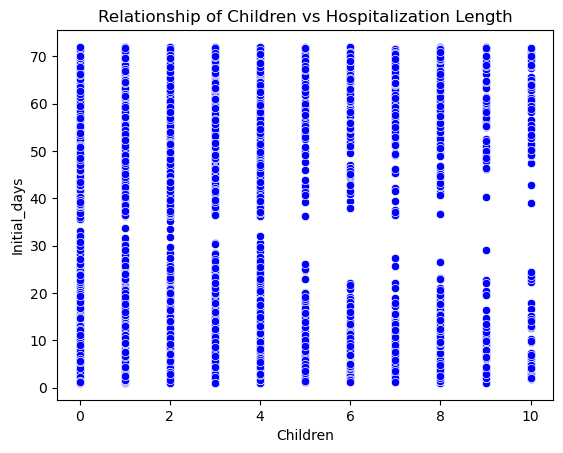

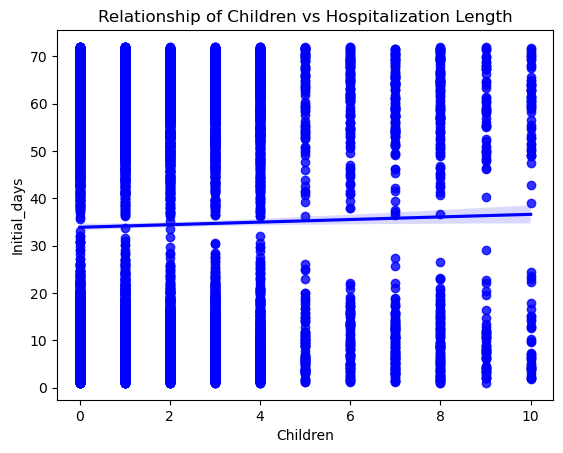

In [137]:
#C3 Bivariate Visualizations for Children vs Initial_days
sns.scatterplot(x='Children', y='Initial_days', data=regression_df, color='blue')
plt.title('Relationship of Children vs Hospitalization Length')
plt.xlabel('Children')
plt.ylabel('Initial_days')
plt.show()

sns.regplot(x='Children', y='Initial_days', data=regression_df, color='blue')
plt.title('Relationship of Children vs Hospitalization Length')
plt.xlabel('Children')
plt.ylabel('Initial_days')
plt.show()

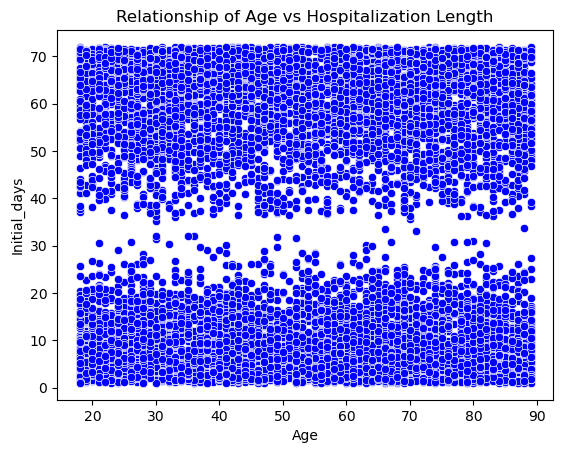

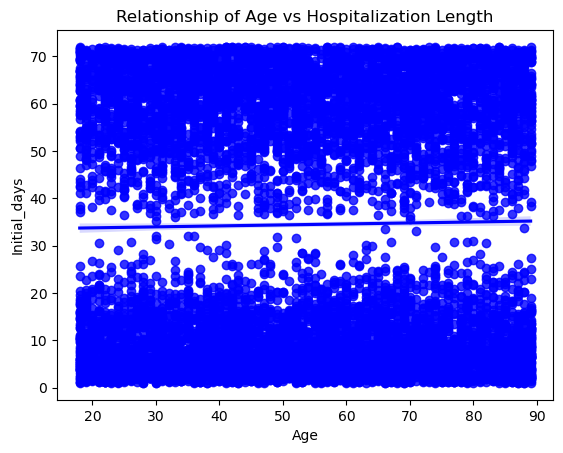

In [139]:
#C3 Bivariate Visualizations for Age vs Initial_days
sns.scatterplot(x='Age', y='Initial_days', data=regression_df, color='blue')
plt.title('Relationship of Age vs Hospitalization Length')
plt.xlabel('Age')
plt.ylabel('Initial_days')
plt.show()

sns.regplot(x='Age', y='Initial_days', data=regression_df, color='blue')
plt.title('Relationship of Age vs Hospitalization Length')
plt.xlabel('Age')
plt.ylabel('Initial_days')
plt.show()

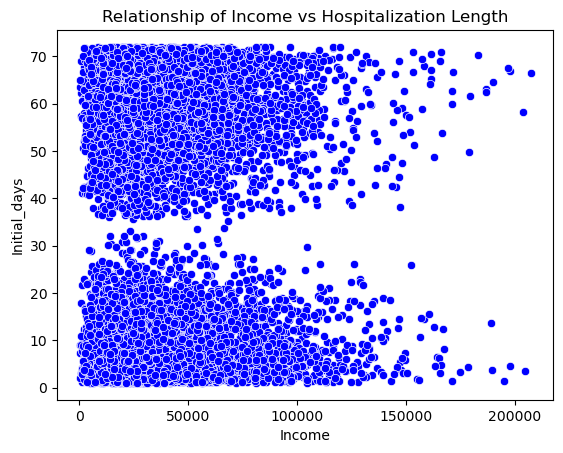

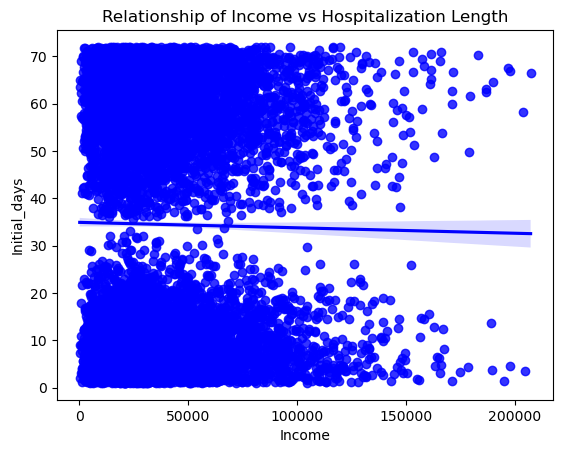

In [141]:
#C3 Bivariate Visualizations for Income vs Initial_days
sns.scatterplot(x='Income', y='Initial_days', data=regression_df, color='blue')
plt.title('Relationship of Income vs Hospitalization Length')
plt.xlabel('Income')
plt.ylabel('Initial_days')
plt.show()

sns.regplot(x='Income', y='Initial_days', data=regression_df, color='blue')
plt.title('Relationship of Income vs Hospitalization Length')
plt.xlabel('Income')
plt.ylabel('Initial_days')
plt.show()

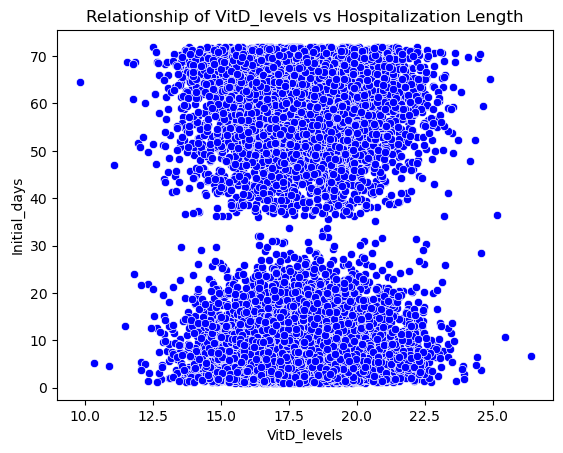

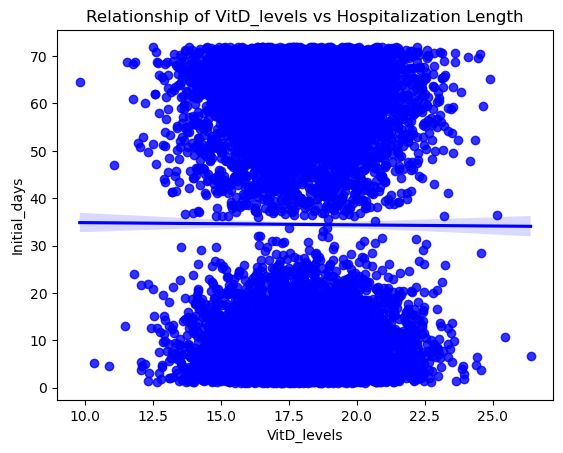

In [143]:
#C3 Bivariate Visualizations for VitD_levels vs Initial_days
sns.scatterplot(x='VitD_levels', y='Initial_days', data=regression_df, color='blue')
plt.title('Relationship of VitD_levels vs Hospitalization Length')
plt.xlabel('VitD_levels')
plt.ylabel('Initial_days')
plt.show()

sns.regplot(x='VitD_levels', y='Initial_days', data=regression_df, color='blue')
plt.title('Relationship of VitD_levels vs Hospitalization Length')
plt.xlabel('VitD_levels')
plt.ylabel('Initial_days')
plt.show()

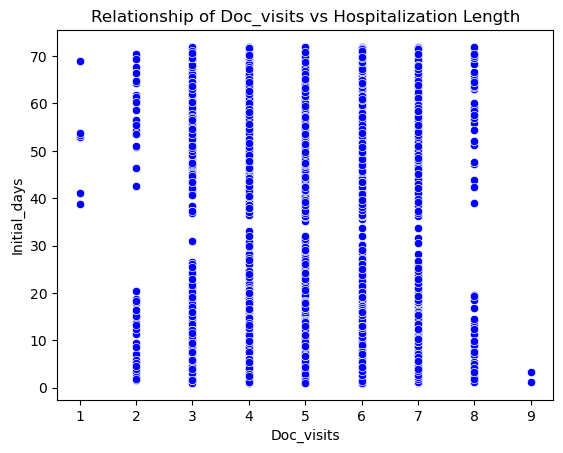

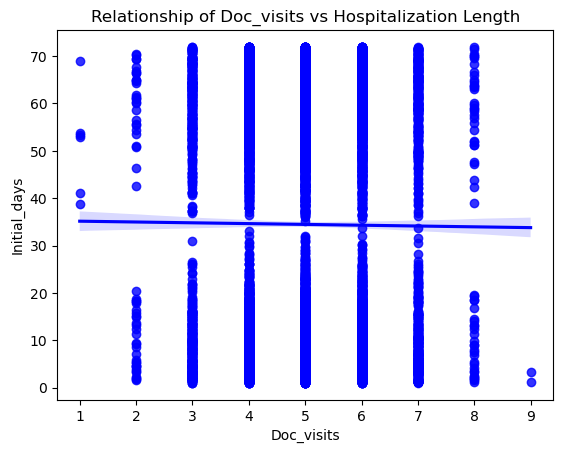

In [145]:
#C3 Bivariate Visualizations for Doc_visits vs Initial_days
sns.scatterplot(x='Doc_visits', y='Initial_days', data=regression_df, color='blue')
plt.title('Relationship of Doc_visits vs Hospitalization Length')
plt.xlabel('Doc_visits')
plt.ylabel('Initial_days')
plt.show()

sns.regplot(x='Doc_visits', y='Initial_days', data=regression_df, color='blue')
plt.title('Relationship of Doc_visits vs Hospitalization Length')
plt.xlabel('Doc_visits')
plt.ylabel('Initial_days')
plt.show()

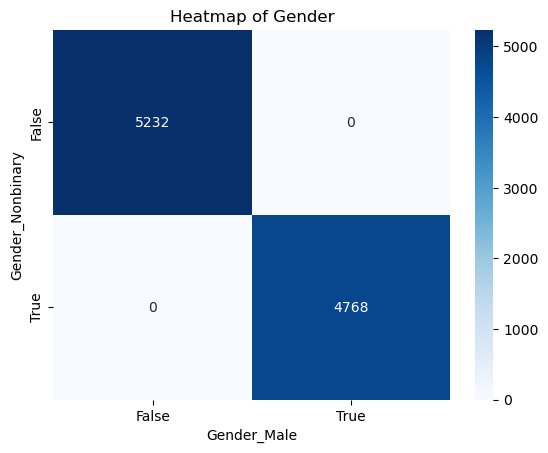

In [147]:
#C3 Bivariate Visualizations for Gender
cross_tab_gender = pd.crosstab(regression_df['gender_male'], regression_df['gender_nonbinary'])

# Plotting the heatmap
sns.heatmap(cross_tab_gender, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Gender')
plt.xlabel('Gender_Male')
plt.ylabel('Gender_Nonbinary')
plt.show()

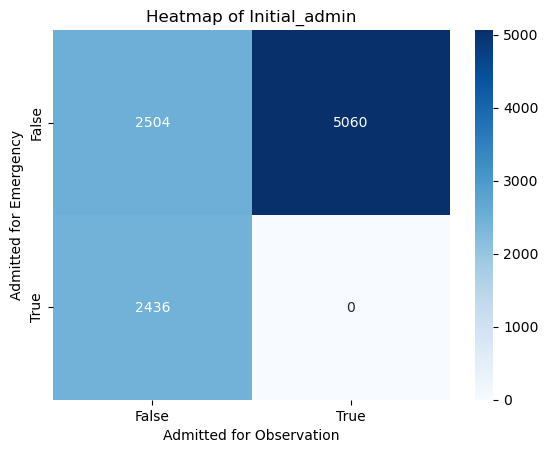

In [149]:
#C3 Bivariate Visualizations for Initial_admin
cross_tab_Initial_admin = pd.crosstab(regression_df['initial_admit_observ'], regression_df['initial_admit_emerg'])

# Plotting the heatmap
sns.heatmap(cross_tab_Initial_admin, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Initial_admin')
plt.xlabel('Admitted for Observation')
plt.ylabel('Admitted for Emergency')
plt.show()

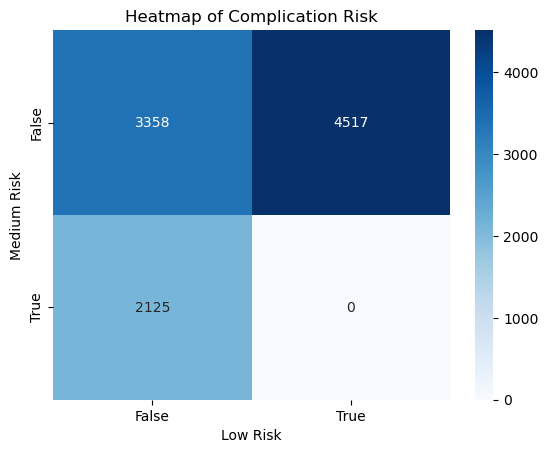

In [151]:
#C3 Bivariate Visualizations for Complication_risk
cross_tab_Complication_risk = pd.crosstab(regression_df['comp_risk_low'], regression_df['comp_risk_medium'])

# Plotting the heatmap
sns.heatmap(cross_tab_Complication_risk, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Complication Risk')
plt.xlabel('Low Risk')
plt.ylabel('Medium Risk')
plt.show()

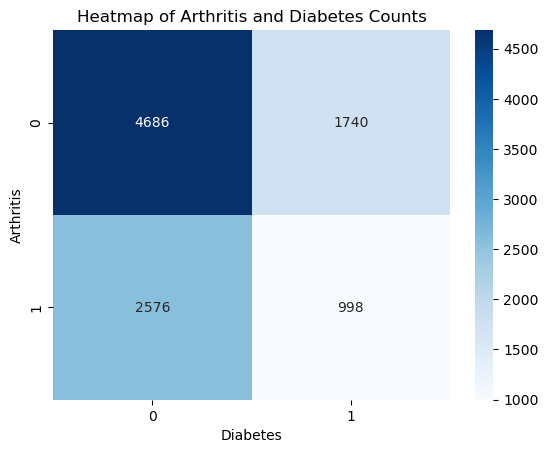

In [153]:
#C3 Bivariate Visualizations for Arthritis and Diabetes
cross_tab_Arth_Diab = pd.crosstab(index=regression_df['Arthritis'], columns=[regression_df['Diabetes']])

# Plotting the heatmap
sns.heatmap(cross_tab_Arth_Diab, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Arthritis and Diabetes Counts')
plt.xlabel('Diabetes')
plt.ylabel('Arthritis')
plt.show()

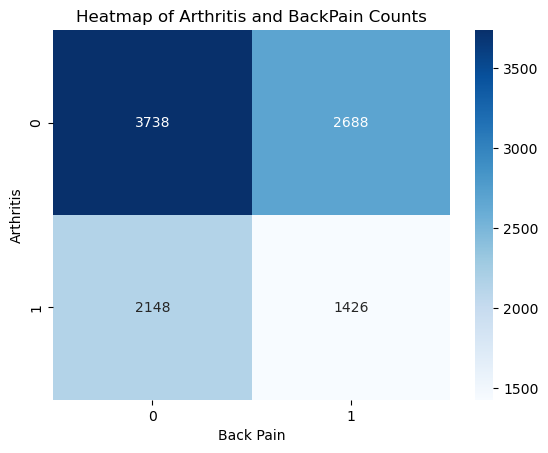

In [155]:
#C3 Bivariate Visualizations for Arthritis and BackPain
cross_tab_Arth_BackP = pd.crosstab(index=regression_df['Arthritis'], columns=[regression_df['BackPain']])

# Plotting the heatmap
sns.heatmap(cross_tab_Arth_BackP, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Arthritis and BackPain Counts')
plt.xlabel('Back Pain')
plt.ylabel('Arthritis')
plt.show()

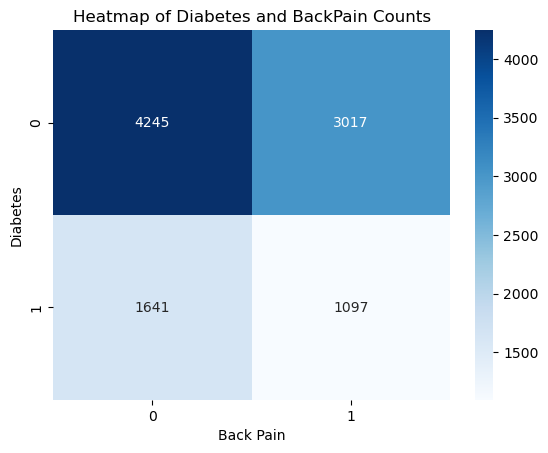

In [157]:
#C3 Bivariate Visualizations for Diabetes and BackPain
cross_tab_Diab_BackP = pd.crosstab(index=regression_df['Diabetes'], columns=[regression_df['BackPain']])

# Plotting the heatmap
sns.heatmap(cross_tab_Diab_BackP, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Diabetes and BackPain Counts')
plt.xlabel('Back Pain')
plt.ylabel('Diabetes')
plt.show()

Part 4: Model Comparision for D1, D2, and D3

In [159]:
print(regression_df.head())

           Children  Age  Income  gender_male  gender_nonbinary  VitD_levels  \
CaseOrder                                                                      
1                 1   53   86575         True              True    19.141466   
2                 3   51   46805        False             False    18.940352   
3                 3   53   14370        False             False    18.057507   
4                 0   78   39741         True              True    16.576858   
5                 1   22    1209        False             False    17.439069   

           Doc_visits  initial_admit_observ  initial_admit_emerg  \
CaseOrder                                                          
1                   6                 False                 True   
2                   4                 False                 True   
3                   4                 False                False   
4                   4                 False                False   
5                   5          

In [161]:
#Checking Data Types prior to creating our model
print(regression_df.dtypes)

Children                  int64
Age                       int64
Income                    int64
gender_male                bool
gender_nonbinary           bool
VitD_levels             float64
Doc_visits                int64
initial_admit_observ       bool
initial_admit_emerg        bool
comp_risk_low              bool
comp_risk_medium           bool
Arthritis                 int64
Diabetes                  int64
BackPain                  int64
Initial_days            float64
TotalCharge             float64
dtype: object


In [163]:
#Converting Boolean data types to Numeric
def convert_to_numeric(regression_df):
    for col in regression_df.columns:
        if regression_df[col].dtype == 'bool':  # Check if the column is boolean
            regression_df.loc[:, col] = regression_df[col].astype(int)  # Convert boolean to int
        else:
            regression_df.loc[:, col] = pd.to_numeric(regression_df[col], errors='coerce')  # Convert to numeric, setting errors to NaN
    return regression_df

regression_df = convert_to_numeric(regression_df)

In [165]:
#Check data types of all columns
print("Data types after conversion:")
print(regression_df.dtypes)

Data types after conversion:
Children                  int64
Age                       int64
Income                    int64
gender_male               int64
gender_nonbinary          int64
VitD_levels             float64
Doc_visits                int64
initial_admit_observ      int64
initial_admit_emerg       int64
comp_risk_low             int64
comp_risk_medium          int64
Arthritis                 int64
Diabetes                  int64
BackPain                  int64
Initial_days            float64
TotalCharge             float64
dtype: object


In [167]:
#C5 Export Data Frames as CSV files
df.to_csv('task1_full_clean.csv', index=False)
regression_df.to_csv('task1_regression_clean.csv', index=False)

In [169]:
#Initial Model
#Set dependent variable for Y
y = regression_df.Initial_days

#Set multiple independent variables for X and add constant
X = regression_df[["Children", "Age", "Income", "gender_male", "gender_nonbinary", "VitD_levels", "Doc_visits", 
                "initial_admit_observ", "initial_admit_emerg", "comp_risk_low", "comp_risk_medium", "Arthritis", 
                "Diabetes", "BackPain", "TotalCharge"]]
X = sm.add_constant(X)  # This will add a constant column

#Double checking that all X columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

#Fit and print the model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.986e+05
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:34:02   Log-Likelihood:                -15249.
No. Observations:               10000   AIC:                         3.053e+04
Df Residuals:                    9985   BIC:                         3.064e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -29.4951 

In [171]:
results.resid.std(ddof=X.shape[1])

1.1126862370663226

In [173]:
#Warning for multicollinearity - check for VIF to see if variables need to be eliminated
X = regression_df[["Children", "Age", "Income", "gender_male", "gender_nonbinary", "VitD_levels", "Doc_visits", 
                "initial_admit_observ", "initial_admit_emerg", "comp_risk_low", "comp_risk_medium", "Arthritis", 
                "Diabetes", "BackPain", "TotalCharge"]]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                 feature        VIF
0               Children   1.932741
1                    Age   7.361227
2                 Income   2.963630
3            gender_male        inf
4       gender_nonbinary        inf
5            VitD_levels  29.950450
6             Doc_visits  19.835725
7   initial_admit_observ   1.950991
8    initial_admit_emerg   3.014566
9          comp_risk_low   1.618548
10      comp_risk_medium   2.324442
11             Arthritis   1.555091
12              Diabetes   1.373587
13              BackPain   1.697394
14           TotalCharge   6.760867


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [175]:
#Eliminated VitD_levels (VIF = 29.950450) and Doc_visits (VIF = 19.835725), running VIF again to see if any values are still above 10
X = regression_df[["Children", "Age", "Income", "gender_male", "gender_nonbinary",  "initial_admit_observ", "initial_admit_emerg", 
                   "comp_risk_low", "comp_risk_medium", "Arthritis", "Diabetes", "BackPain", "TotalCharge"]]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                 feature       VIF
0               Children  1.880773
1                    Age  5.568718
2                 Income  2.740994
3            gender_male       inf
4       gender_nonbinary       inf
5   initial_admit_observ  1.810973
6    initial_admit_emerg  2.769873
7          comp_risk_low  1.548161
8       comp_risk_medium  2.148653
9              Arthritis  1.535005
10              Diabetes  1.358931
11              BackPain  1.670107
12           TotalCharge  5.435098


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [177]:
regress_df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(regression_df), 
                                 columns=regression_df.columns)
regress_df_minmax

,Children,Age,Income,gender_male,gender_nonbinary,VitD_levels,Doc_visits,initial_admit_observ,initial_admit_emerg,comp_risk_low,comp_risk_medium,Arthritis,Diabetes,BackPain,Initial_days,TotalCharge
0,0.1,0.492958,0.417301,1.0,1.0,0.562756,0.625,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.135022,0.246933
1,0.3,0.464789,0.225264,0.0,0.0,0.550632,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.199037,0.311343
2,0.3,0.492958,0.068645,0.0,0.0,0.497410,0.375,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.053117,0.068475
3,0.0,0.845070,0.191154,1.0,1.0,0.408150,0.375,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.010044,0.026168
4,0.1,0.056338,0.005094,0.0,0.0,0.460128,0.500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.003562,0.024130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.2,0.098592,0.221217,1.0,1.0,0.432505,0.375,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.712308,0.678314
9996,0.4,0.971831,0.071605,1.0,1.0,0.504615,0.500,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.953321,0.801304
9997,0.3,0.380282,0.317550,0.0,0.0,0.441440,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.974256,0.875146
9998,0.3,0.352113,0.142678,1.0,1.0,0.609113,0.500,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.878492,0.787882


In [179]:
#Reduced model by eliminating Doc_visits and VitD_levels due to multicolinearity issues
#Continue reducing model with backward elimination, removing the highest p-value (alpha = 0.05) and evaluating model again

#Backwards Elimination 1: Seek highest p-value above 0.05
y = regress_df_minmax.Initial_days
X = regress_df_minmax[["Children", "Age", "Income", "gender_male", "gender_nonbinary",  "initial_admit_observ", "initial_admit_emerg", 
                   "comp_risk_low", "comp_risk_medium", "Arthritis", "Diabetes", "BackPain", "TotalCharge"]]
X = sm.add_constant(X)  # This will add a constant column

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.651e+05
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:35:34   Log-Likelihood:                 27374.
No. Observations:               10000   AIC:                        -5.472e+04
Df Residuals:                    9987   BIC:                        -5.463e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0957 

In [181]:
#BACKWARD ELIMINATION 2: Seek highest p-value above 0.05 (eliminated gender_male and gender_nonbinary, p-values of 0.946)
y = regress_df_minmax.Initial_days
X = regress_df_minmax[["Children", "Age", "Income",  "initial_admit_observ", "initial_admit_emerg", "comp_risk_low", "comp_risk_medium", 
                   "Arthritis", "Diabetes", "BackPain", "TotalCharge"]]
X = sm.add_constant(X)  # This will add a constant column

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.074e+05
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:36:18   Log-Likelihood:                 27374.
No. Observations:               10000   AIC:                        -5.472e+04
Df Residuals:                    9988   BIC:                        -5.464e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0957 

In [183]:
#Backwards Elimination  3: Seek highest p-value above 0.05 (eliminated Children, p-value of 0.816)
y = regress_df_minmax.Initial_days
X = regress_df_minmax[["Age", "Income",  "initial_admit_observ", "initial_admit_emerg", "comp_risk_low", "comp_risk_medium", 
                   "Arthritis", "Diabetes", "BackPain", "TotalCharge"]]
X = sm.add_constant(X)  # This will add a constant column

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.582e+05
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:36:42   Log-Likelihood:                 27374.
No. Observations:               10000   AIC:                        -5.473e+04
Df Residuals:                    9989   BIC:                        -5.465e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0957 

In [185]:
#Backwards Elimination  4: Seek highest p-value above 0.05 (eliminated Age, p-value of 0.585)
y = regress_df_minmax.Initial_days
X = regress_df_minmax[["Income",  "initial_admit_observ", "initial_admit_emerg", "comp_risk_low", "comp_risk_medium", 
                   "Arthritis", "Diabetes", "BackPain", "TotalCharge"]]
X = sm.add_constant(X)  # This will add a constant column

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.203e+05
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:36:55   Log-Likelihood:                 27374.
No. Observations:               10000   AIC:                        -5.473e+04
Df Residuals:                    9990   BIC:                        -5.466e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0958 

In [187]:
#Backwards Elimination  5: Seek highest p-value above 0.05 (eliminated initial_admit_observ, p-value of 0.505)
y = regress_df_minmax.Initial_days
X = regress_df_minmax[["Income", "initial_admit_emerg", "comp_risk_low", "comp_risk_medium", 
                   "Arthritis", "Diabetes", "BackPain", "TotalCharge"]]
X = sm.add_constant(X)  # This will add a constant column

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.979e+05
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:37:12   Log-Likelihood:                 27374.
No. Observations:               10000   AIC:                        -5.473e+04
Df Residuals:                    9991   BIC:                        -5.466e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0957    

In [189]:
#Backwards Elimination  6: Seek highest p-value above 0.05 (eliminated Income, p-value of 0.367)
y = regress_df_minmax.Initial_days
X = regress_df_minmax[["initial_admit_emerg", "comp_risk_low", "comp_risk_medium", "Arthritis", "Diabetes", "BackPain", "TotalCharge"]]
X = sm.add_constant(X)  # This will add a constant column

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.976e+05
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:37:27   Log-Likelihood:                 27373.
No. Observations:               10000   AIC:                        -5.473e+04
Df Residuals:                    9992   BIC:                        -5.467e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0959    

In [191]:
results.resid.std(ddof=X.shape[1])

0.015672009109192912

In [193]:
#Final Reduced Model
y = regress_df_minmax.Initial_days
X = regress_df_minmax[["initial_admit_emerg", "comp_risk_low", "comp_risk_medium", "Arthritis", 
                       "Diabetes", "BackPain", "TotalCharge"]].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.976e+05
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:38:06   Log-Likelihood:                 27373.
No. Observations:               10000   AIC:                        -5.473e+04
Df Residuals:                    9992   BIC:                        -5.467e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
initial_admit_emerg    -0.0884    

Part 4: Model Comparison and Analysis for E1 and E2

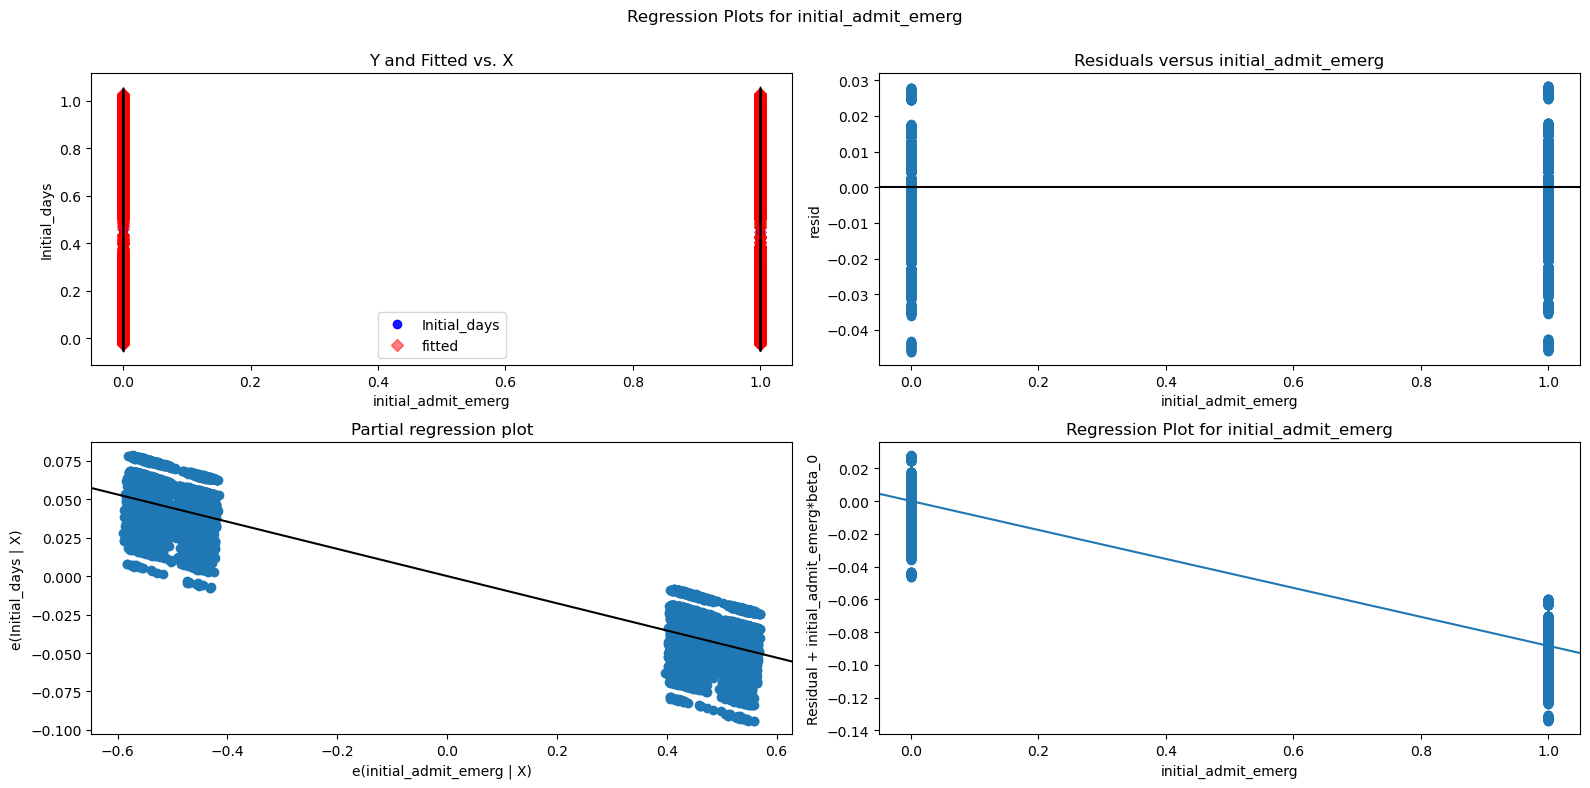

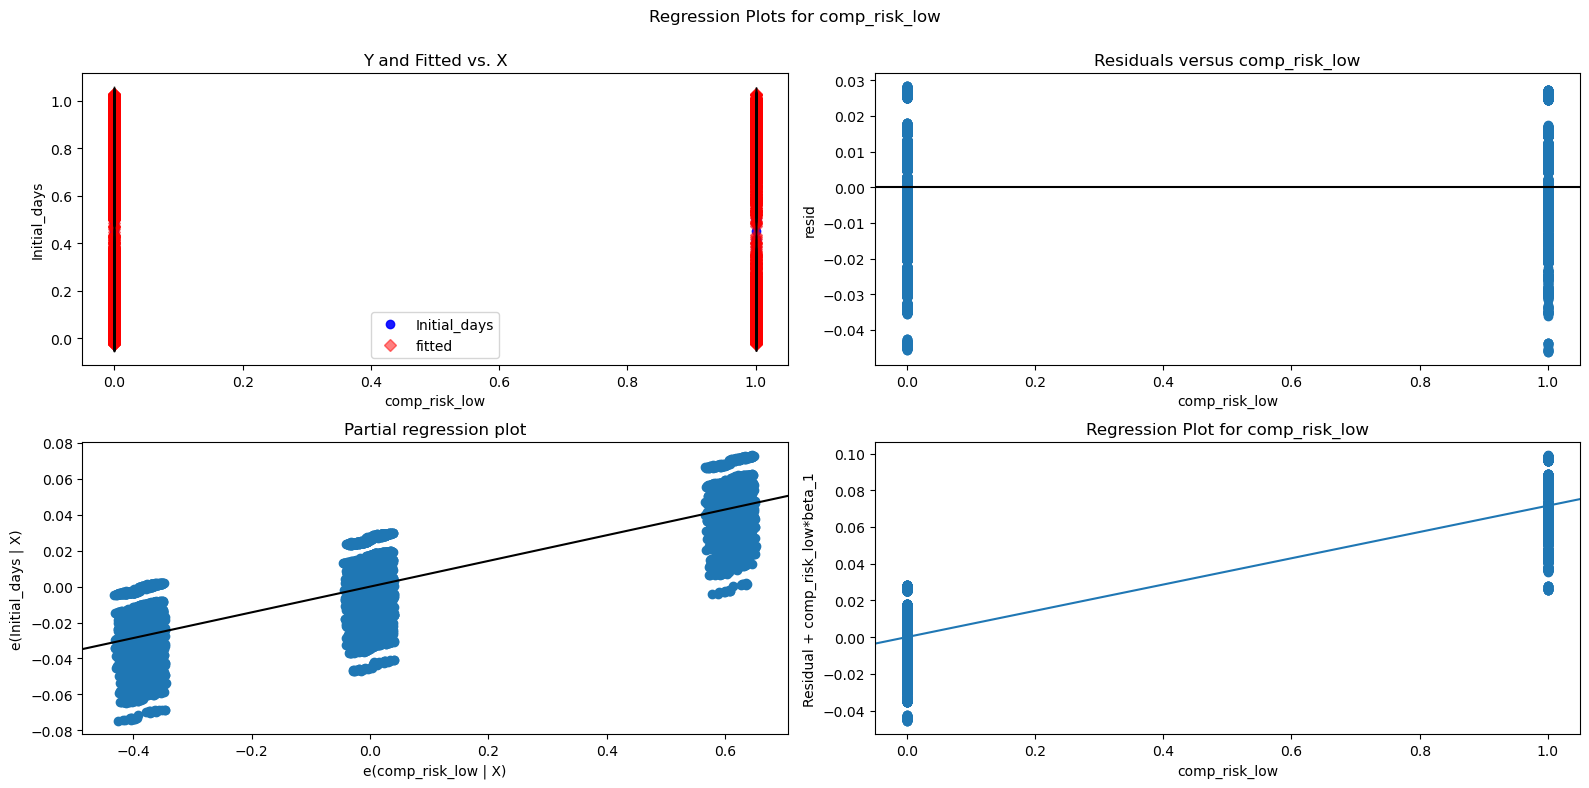

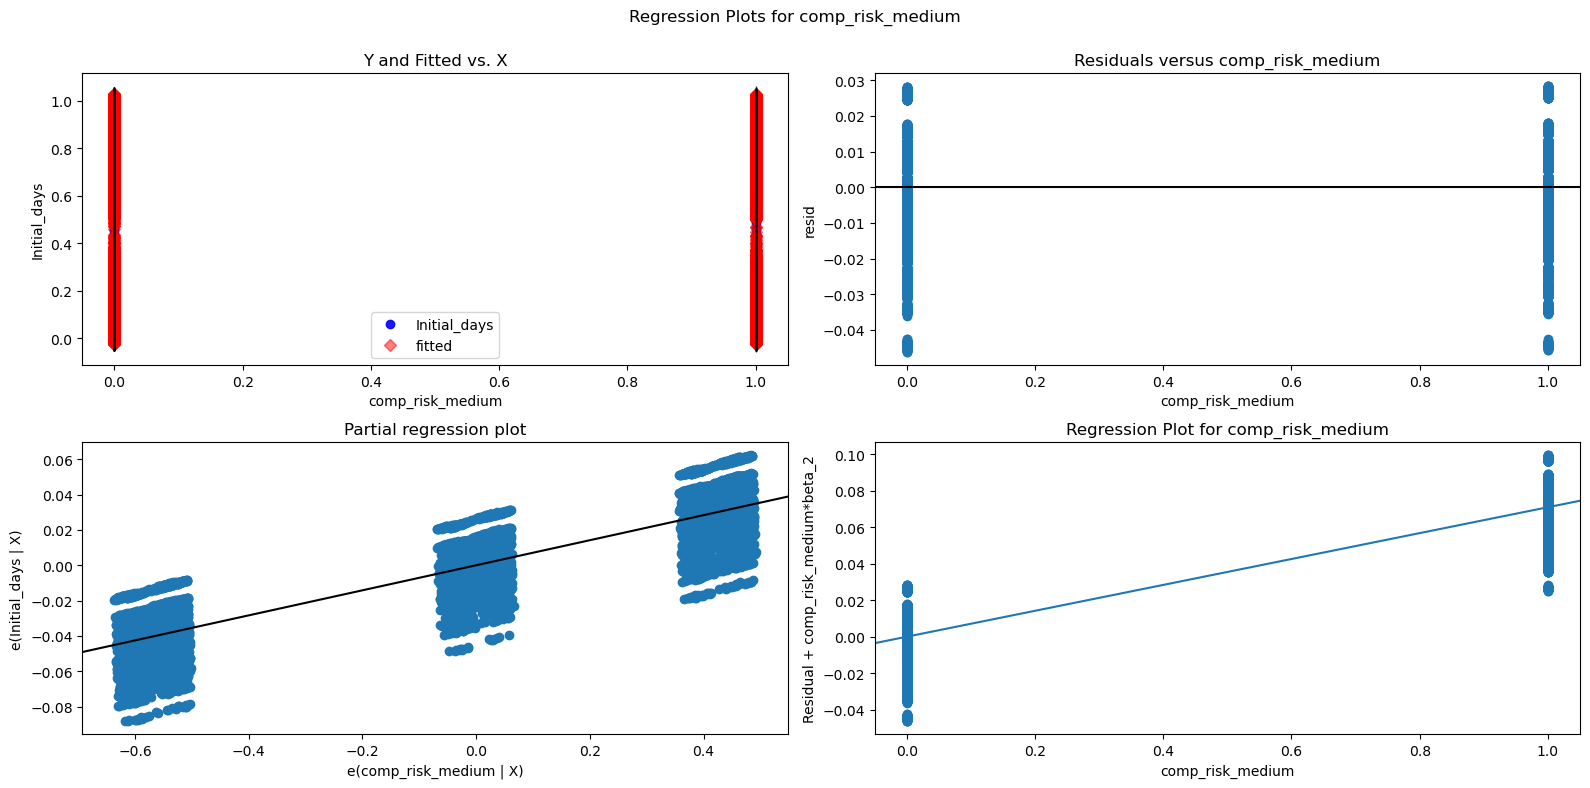

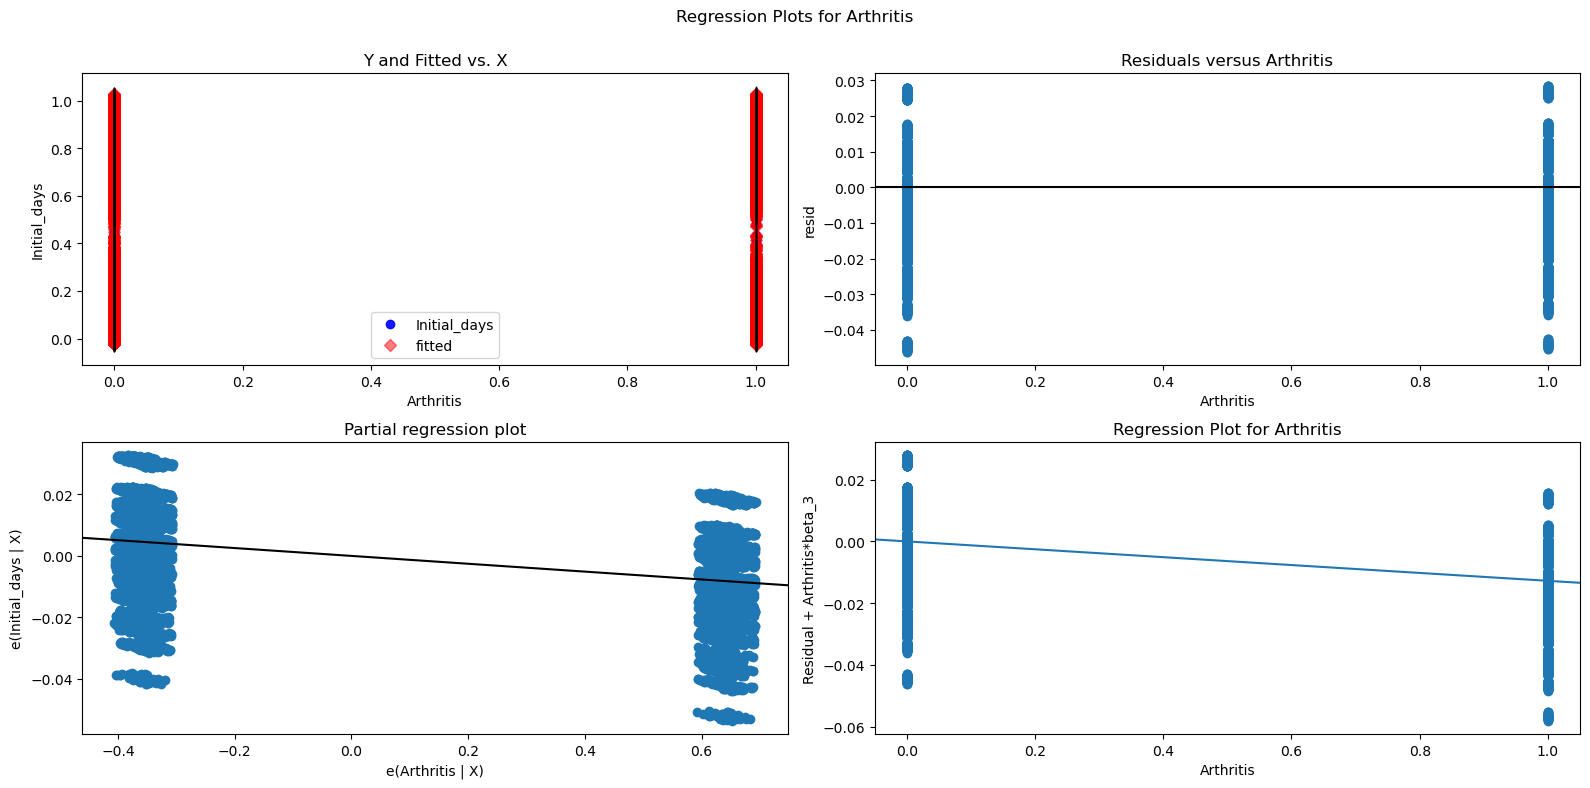

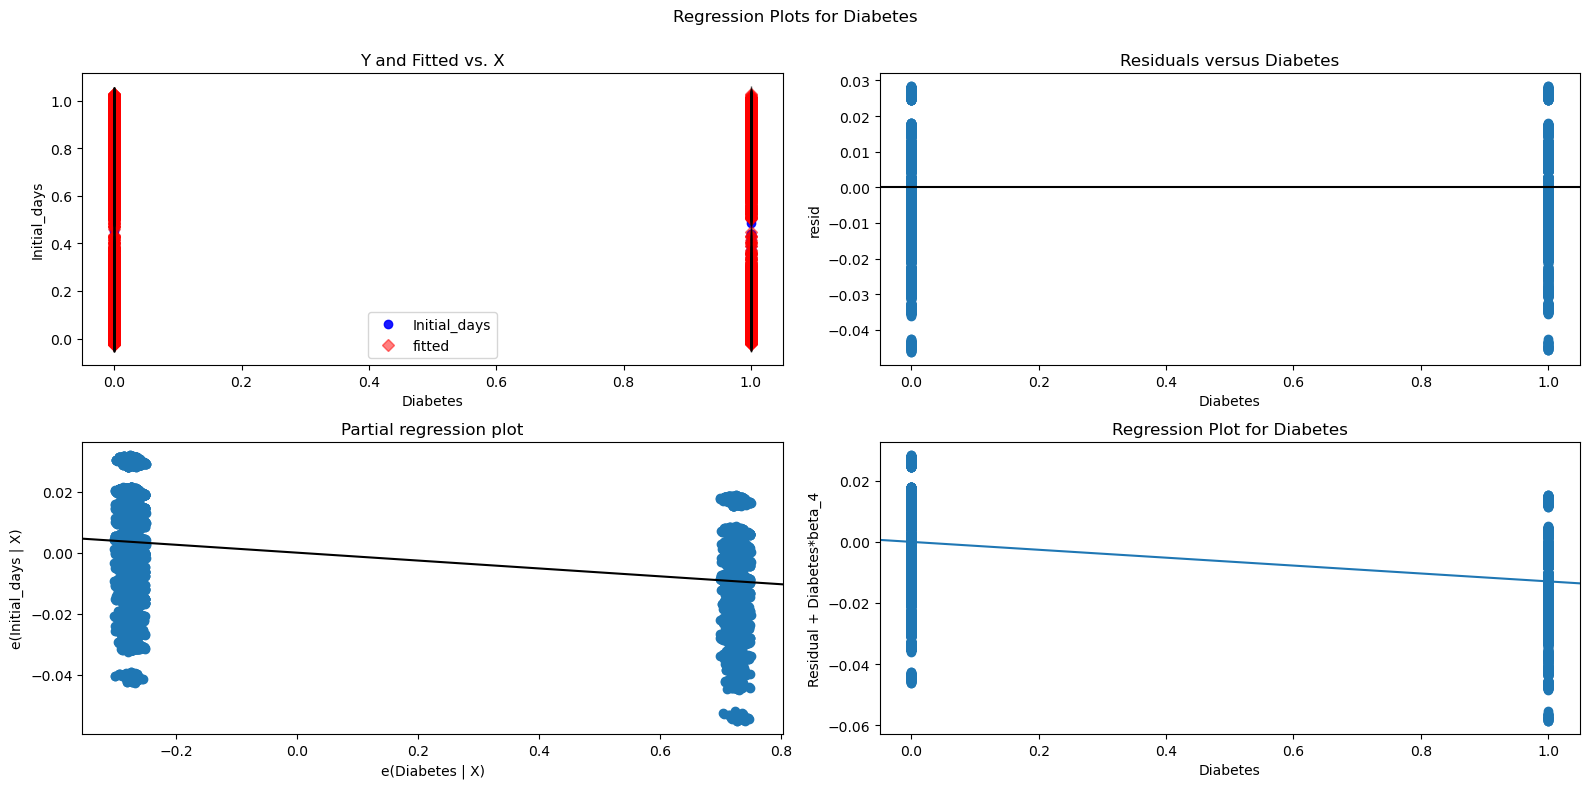

In [ ]:
#Residual Plots for the final model
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'initial_admit_emerg', fig=fig)
plt.title('Regression Plot for initial_admit_emerg')
plt.show()

fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'comp_risk_low', fig=fig)
plt.title('Regression Plot for comp_risk_low')
plt.show()

fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'comp_risk_medium', fig=fig)
plt.title('Regression Plot for comp_risk_medium')
plt.show()

fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Arthritis', fig=fig)
plt.title('Regression Plot for Arthritis')
plt.show()

fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Diabetes', fig=fig)
plt.title('Regression Plot for Diabetes')
plt.show()

fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'BackPain', fig=fig)
plt.title('Regression Plot for BackPain')
plt.show()

fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'TotalCharge', fig=fig)
plt.title('Regression Plot for TotalCharge')
plt.show()